<a href="https://colab.research.google.com/github/raaz12p/Almabetterprojects/blob/main/Copy_of_Module_6_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Closing Stock Price Prediction**

# **Git Hub link**

# **Introduction**
In this project we explore and analyze a dataset related to **Yes bank Closing stock price Prediction**.Using Machine learning techniques,Specially **Regression** we aim to Predict closing Stock Price.
This project Demonstrates the complete Machine learning work flow,from **Data processing** and **exploratory data analysis (EDA)** to **regression model  selection** and **evaluation**.

# **Project Outline**


1.   **Data loading and Preprocessing**
      * Loading the data set and performing preprocessing  
      
2.  **Exploratory data Analysis(EDA)**
      *  Visualizing relationships and distributions within the data

3.   **Regression**
      *  Appling best fit model

4.    **Model tunig**





In [ ]:
!pip install numpy pandas matplotlib scikit-learn keras tensorflow

**Setup and data loading**

# **Step 1 :Setup and Import essential Liabraries**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path=('/content/drive/MyDrive/YesBank_StockPrices.csv')

stock_data=pd.read_csv(file_path)
print(stock_data)

       Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]


# **Step 3 : Inspect the dataset**

---



**Step 3 :** Data preprocessing handle missing values,outliers and scale the data.

In [ ]:
# Check for Missing Values
missing_values=stock_data.isnull().sum()

#Display missing values
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
stock_data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Step 4 : Data Preprocess :**detect outliers by box plot and handle by capping at 1st and 99th percentiles:

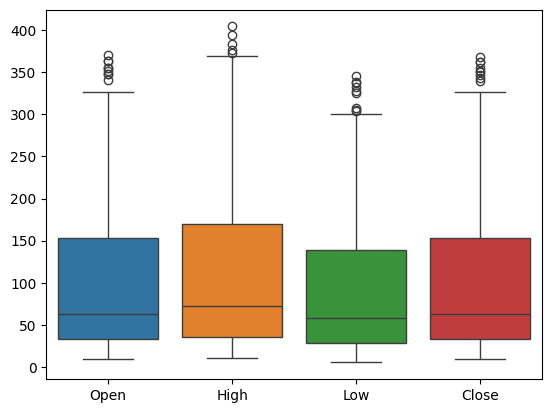

In [ ]:
sns.boxplot(data=stock_data)
plt.show()

In [ ]:
# show Outliers
numeric_data = stock_data.select_dtypes(include=[np.number])
Q1 = numeric_data.quantile(0.15)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = stock_data[outliers]
print(outliers_df)

       Date    Open    High     Low   Close
144  Jul-17  293.04  372.00  290.78  361.96
145  Aug-17  363.00  368.52  337.37  351.15
146  Sep-17  351.00  383.25  345.50  350.00
147  Oct-17  354.60  375.75  299.00  314.35
150  Jan-18  314.00  366.00  307.35  354.45
151  Feb-18  355.00  366.50  304.65  322.25
153  Apr-18  305.00  368.75  303.30  362.05
154  May-18  362.85  364.40  325.70  346.20
155  Jun-18  348.00  350.10  327.35  339.60
156  Jul-18  340.00  393.35  332.45  367.90
157  Aug-18  369.95  404.00  338.00  343.40


In [ ]:
stock_data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# **Step 5 : Create Features and Lables**
We'll use previous closing prices to predict the next day's closing price.



In [ ]:
# Create a new column 'Previous Close' that shifts the 'Close' column by one day
stock_data['Previous Close'] = stock_data['Close'].shift(1)

# Drop the first row since it will have a NaN value in 'Previous Close'
stock_data = stock_data.dropna()

# Define the features (X) and the label (y)
X = stock_data[['Previous Close']]
y = stock_data['Close']

# Display the first few rows of features and labels
print(X.head())
print(y.head())


   Previous Close
1           12.46
2           13.42
3           13.30
4           12.99
5           13.41
1    13.42
2    13.30
3    12.99
4    13.41
5    13.71
Name: Close, dtype: float64


# **Step 6: Split the Data into Training and Testing Sets**


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(147, 1) (37, 1) (147,) (37,)


# **Step 7: Train a Regression Model**


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

# **Step 8: Evaluate the Model**


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the closing prices on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Value: {r2:.4f}")

Mean Squared Error: 453.7563
R-squared Value: 0.9442


# **Step 9: Make Predictions and Visualize the Results**


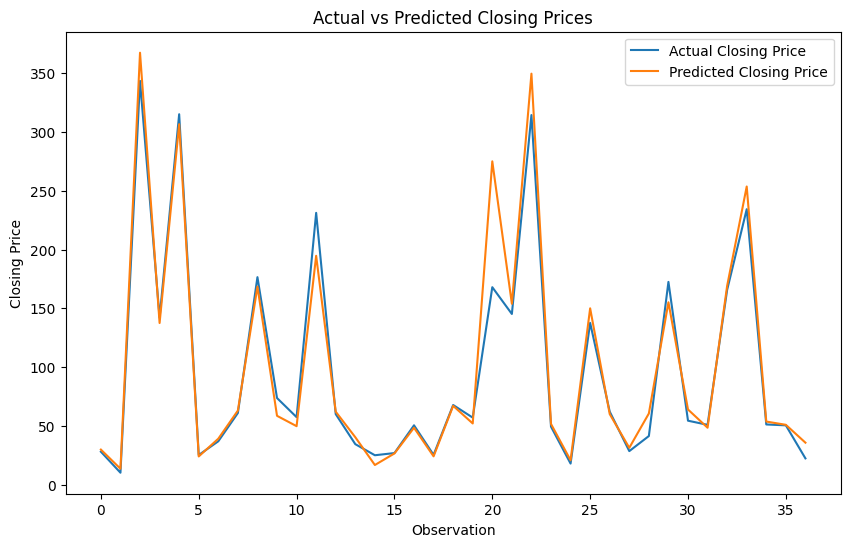

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted closing prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Observation')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# **Conclusion**
The performance metrics (MSE and R-squared) indicate how well the regression model predicts the closing prices. A lower MSE and a higher R-squared value suggest a better model fit.

If the R-squared value is close to 1, the model explains most of the variability in the target variable (Close price). Conversely, a low R-squared value would suggest that the model isn't capturing the underlying pattern effectively.